**Installing needed models**

In [1]:
!pip install opencv-python

!pip install mediapipe

!pip install scikit-learn

!pip install pandas

!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Importing needed models**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import mediapipe as mp
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


**Determine the dataset path**

In [2]:
dataset = 'Data'
model_save_path = 'The saved model/model.keras'


**Determine the number of classes**

In [3]:
NUM_CLASSES = 10

**Define the load date function**

In [4]:
def load_dataset(dataset_path):
    x = []
    y = []
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7, max_num_hands=2)

    # Loop through dataset directory
    for signFolder in os.listdir(dataset_path):
        signLabel = signFolder
        folderPath = os.path.join(dataset_path, signFolder)

        # Loop through video files in exercise folder
        for video_file in os.listdir(folderPath):
            video_path = os.path.join(folderPath, video_file)
            cap = cv2.VideoCapture(video_path)
            while cap.isOpened():
                success, image = cap.read()
                if not success:
                    break
                # Process image using MediaPipe Hand Gesture Recognition
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = hands.process(image_rgb)
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        # Extract hand landmarks
                        landmarks = [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]
                        x.append(landmarks)
                        y.append(signLabel)
            cap.release()
    return np.array(x), np.array(y)

**loading data**

In [5]:
x, y = load_dataset(dataset)

In [6]:
print(x)

[[[ 2.42535606e-01  8.53370547e-01  7.34941139e-08]
  [ 2.19930798e-01  8.41227353e-01 -5.04050916e-03]
  [ 2.03145429e-01  8.16498935e-01 -8.54440592e-03]
  ...
  [ 2.31028110e-01  7.55015373e-01 -1.51680605e-02]
  [ 2.27058828e-01  7.39709914e-01 -1.49981370e-02]
  [ 2.23591894e-01  7.27897763e-01 -1.47238644e-02]]

 [[ 2.24047184e-01  7.71708548e-01  5.84391771e-08]
  [ 2.07625344e-01  7.59727478e-01 -1.12437978e-02]
  [ 1.94187164e-01  7.35766709e-01 -1.84973069e-02]
  ...
  [ 2.17151150e-01  6.38982773e-01 -2.09469590e-02]
  [ 2.13120580e-01  6.20126247e-01 -2.21872851e-02]
  [ 2.08582625e-01  6.03395164e-01 -2.30736602e-02]]

 [[ 2.08527192e-01  7.01337576e-01  9.98239642e-08]
  [ 2.18214244e-01  6.80169284e-01 -1.38707813e-02]
  [ 2.20340073e-01  6.47959113e-01 -2.04064250e-02]
  ...
  [ 1.65295199e-01  5.72248399e-01 -1.71006657e-02]
  [ 1.61938608e-01  5.49961507e-01 -1.88091472e-02]
  [ 1.59681991e-01  5.28560638e-01 -1.96698569e-02]]

 ...

 [[ 3.91072392e-01  6.41339600e-01

In [7]:
print(y)

['Busy' 'Busy' 'Busy' ... 'Who' 'Who' 'Who']


**Change the label's names to numerical values**

In [8]:
for i in range(y.size):
  if y[i] == 'Busy':
    y[i] = 0
  elif y[i] == 'Chair':
    y[i] = 1
  elif y[i] == 'Excuse me':
    y[i] = 2
  elif y[i] == 'Goodbye':
    y[i] = 3
  elif y[i] == 'I am fine':
    y[i] = 4
  elif y[i] == 'I am tired':
    y[i] = 5
  elif y[i] == "I don't know":
    y[i] = 6
  elif y[i] == 'Internet':
    y[i] = 7
  elif y[i] == 'Take care':
    y[i] = 8
  elif y[i] == "Who":
    y[i] = 9
  else:
    y[i] = -1

print(y)

['0' '0' '0' ... '9' '9' '9']


In [9]:
print(len(y))



30897


**Making sure that the x and y is np.float32**

In [12]:
if x.dtype != np.float32:
    x = x.astype(np.float32)
if y.dtype != np.float32:
    y = y.astype(np.float32)

**Divide the dataset into train data and test data**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Building the model**

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 19, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,474 (494.04 KB)

 Trainable params: 126,474 (494.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

**Defining the call back function**

In [17]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

**Training the model**

In [18]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[cp_callback, es_callback],
)

Epoch 1/200
307/309 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2886 - loss: 1.9438
Epoch 1: saving model to The saved model/model.keras
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2898 - loss: 1.9411 - val_accuracy: 0.5975 - val_loss: 1.1427
Epoch 2/200
303/309 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6237 - loss: 1.0773
Epoch 2: saving model to The saved model/model.keras
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6244 - loss: 1.0750 - val_accuracy: 0.7615 - val_loss: 0.7242
Epoch 3/200
305/309 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7557 - loss: 0.7301
Epoch 3: saving model to The saved model/model.keras
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7560 - loss: 0.7294 - val_accuracy: 0.8758 - val_loss: 0.4963
Epoch 4/200
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8435 - loss: 0.5136
Epoch 4: saving model to The saved model/model.keras
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8435 - loss: 0.5135 - val_

**Evaluate data**

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9983 - loss: 0.0037


**Visualization for Test and Train (Learning curves)**

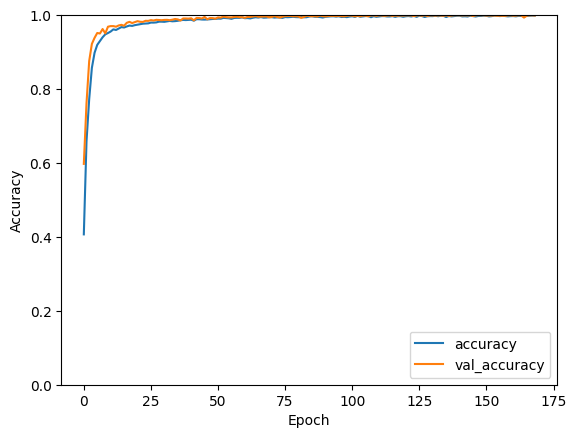

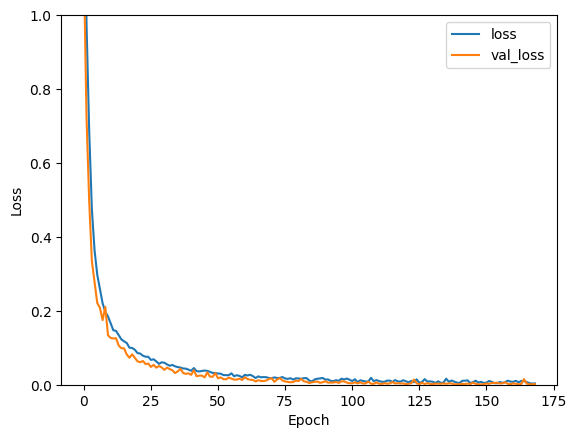

In [42]:
plt.plot(history.history['accuracy'], label='accuracy') 
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.ylim([0, 1]) 
plt.legend(loc='lower right') 
plt.show() 

plt.plot(history.history['loss'], label='loss') 
plt.plot(history.history['val_loss'], label = 'val_loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.ylim([0, 1]) 
plt.legend(loc='upper right') 
plt.show()

**Load the model**

In [20]:
model = tf.keras.models.load_model(model_save_path)

**Defining confusion matrix**

194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


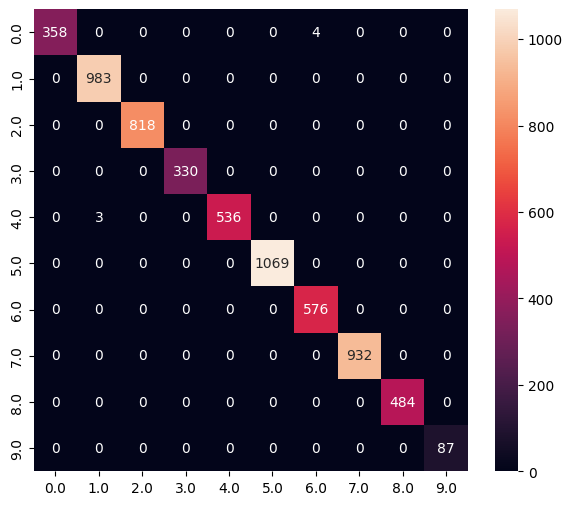

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       362
         1.0       1.00      1.00      1.00       983
         2.0       1.00      1.00      1.00       818
         3.0       1.00      1.00      1.00       330
         4.0       1.00      0.99      1.00       539
         5.0       1.00      1.00      1.00      1069
         6.0       0.99      1.00      1.00       576
         7.0       1.00      1.00      1.00       932
         8.0       1.00      1.00      1.00       484
         9.0       1.00      1.00      1.00        87

    accuracy                           1.00      6180
   macro avg       1.00      1.00      1.00      6180
weighted avg       1.00      1.00      1.00      6180



In [29]:

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

**Testing the model**

In [23]:

video_path = 'busy-in-asl_kfww2HVF - Copy (2) - Copy.mp4'
cap = cv2.VideoCapture(video_path)

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7, max_num_hands=2)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Process frame with MediaPipe Hand Gesture Recognition
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    # Check if hand landmarks are detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Extract hand landmarks
            landmarks = [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]

            # Preprocess landmarks (reshape, convert to numpy array, etc.)
            # Example:
            landmarks_array = np.array(landmarks, dtype=np.float32)
            landmarks_array = landmarks_array[np.newaxis, ...]  # Add batch dimension

            # Use the model to make predictions
            predictions = model.predict(landmarks_array)

            # Example: Print the predicted class
            if (np.argmax(predictions) == 0):
              print("Predicted Class: Busy")
            elif (np.argmax(predictions) == 1):
              print("Predicted Class: Execuse me")
            elif (np.argmax(predictions) == 2):
              print("Predicted Class: Good morning")
            elif (np.argmax(predictions) == 3):
              print("Predicted Class: Good night")
            elif (np.argmax(predictions) == 4):
              print("Predicted Class: Goodbye")
            elif (np.argmax(predictions) == 5):
              print("Predicted Class: Happy birthday")
            elif (np.argmax(predictions) == 6):
              print("Predicted Class: Hello")
            elif (np.argmax(predictions) == 7):
              print("Predicted Class: How are you")
            elif (np.argmax(predictions) == 8):
              print("Predicted Class: I am fine")
            elif (np.argmax(predictions) == 9):
              print("Predicted Class: I am tired")
            elif (np.argmax(predictions) == 10):
              print("Predicted Class: I don't know")
            elif (np.argmax(predictions) == 11):
              print("Predicted Class: I love you")
            elif (np.argmax(predictions) == 12):
              print("Predicted Class: Nice to meet you")
            elif (np.argmax(predictions) == 13):
              print("Predicted Class: Take care")
            elif (np.argmax(predictions) == 14):
              print("Predicted Class: Thank you")
            else:
              print("nothing")

    # Display the frame
    cv2.imshow('Hello',frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()
